# 浮雕效果  
浮雕效果就是边缘图，但边缘的角度最好是45度角

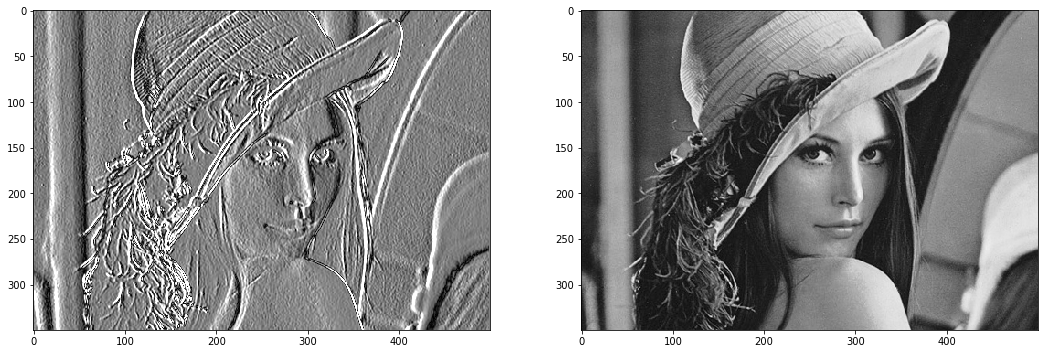

In [128]:
from matplotlib import pyplot as plt
import os,sys,cv2
import numpy as np

source = cv2.imread('images/0.jpg',0)
edge = cv2.Sobel(source, cv2.CV_16S, 1, 0) + 128  #最好是45度边缘，这里用Sobel替代
edge = np.clip(np.abs(edge),0,255)
edge = np.expand_dims(edge,2)
edge = np.concatenate([edge,edge,edge],axis=-1).astype(np.uint8)
fig = plt.figure(figsize=(18, 18))
plt.subplot(1,2,1)
plt.imshow(edge,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(source,cmap='gray')



# 铅笔画  
铅笔画就是二值化的边缘图

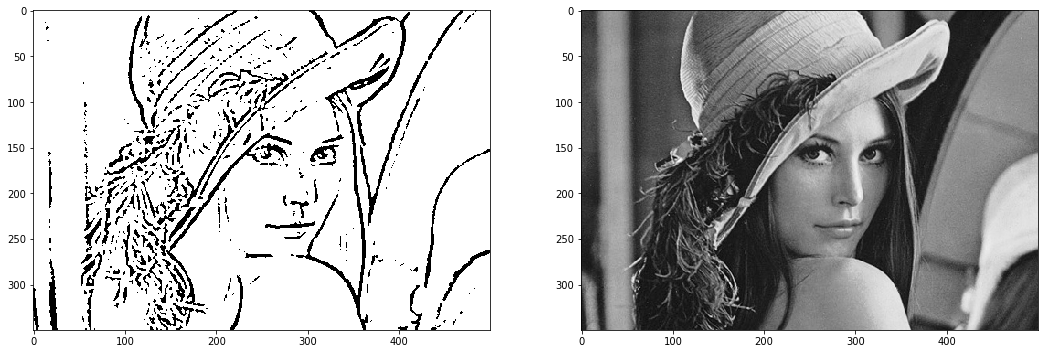

In [114]:
from matplotlib import pyplot as plt
import os,sys,cv2
import numpy as np


    
source = cv2.imread('images/0.jpg',0)
edge = cv2.GaussianBlur(source,(3,3),5) 
edge = cv2.adaptiveThreshold(edge, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 10)
fig = plt.figure(figsize=(18, 18))
plt.subplot(1,2,1)
plt.imshow(edge,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(source,cmap='gray')

# 卡通画 
  卡通画需要三个步骤
  * 提取图像轮廓
  * 使用bilateral对图像进行保边滤波
  * 使用轮廓图mask对模糊图做bitwise_and操作


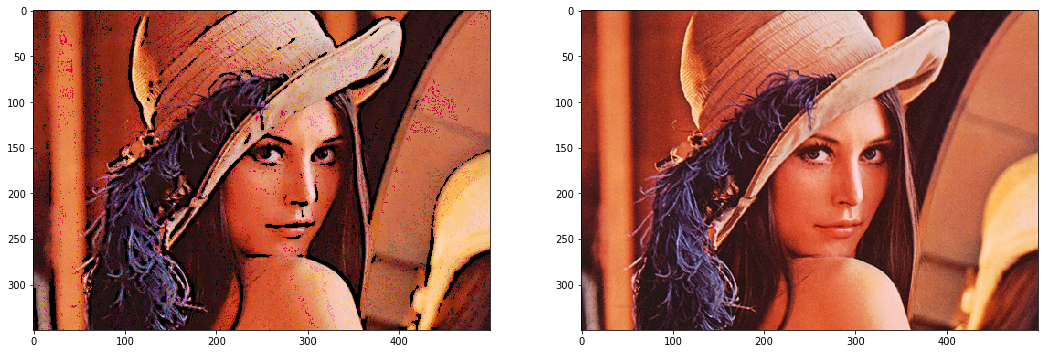

In [127]:


from matplotlib import pyplot as plt
import os,sys,cv2
import numpy as np


source = cv2.imread('images/0.jpg',1)
#################################################
#提取边缘
gray = cv2.cvtColor(source,cv2.COLOR_BGR2GRAY)
edge = cv2.GaussianBlur(gray,(5,5),5) 
edge = cv2.adaptiveThreshold(edge, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 10)


#######################################################
#双边滤波器
smooth = cv2.bilateralFilter(source,9,20,50) 

#################################################
#融合
cartoon = cv2.bitwise_and(smooth, source, mask = edge)

fig = plt.figure(figsize=(18, 18))
plt.subplot(1,2,1)
plt.imshow(cartoon[:,:,::-1],cmap='gray')
#plt.imshow(smooth,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(source[:,:,::-1],cmap='gray')


# 马赛克 
* 把图像划分小块
* 每个小块内所有像素灰度用小块均值替换

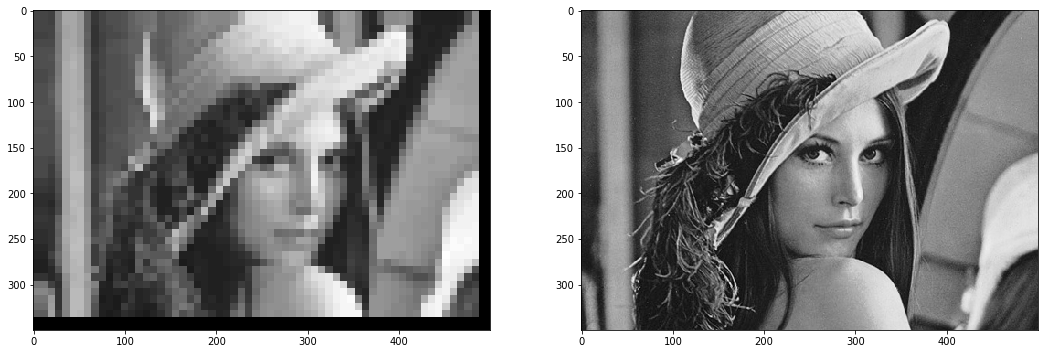

In [116]:


from matplotlib import pyplot as plt
import os,sys,cv2
import numpy as np

K = 8
source = cv2.imread('images/0.jpg',0)
#################################################
#PADDING
source_padding = cv2.copyMakeBorder(source, K*2, K * 2, K * 2, K * 2, cv2.BORDER_REFLECT)

####################################################
#积分图
II = cv2.integral(source_padding)

#####################################################
#马赛克
H,W = source.shape
mosaic = np.zeros((H,W))
validH, validW = H//K*K, W//K*K
for y in range(0,validH - K,K):
    for x in range(0,validW - K,K):
        mosaic[y:y+K,x:x+K] = (II[y + K,x + K] + II[y+K + K, x+K + K] - II[y + K,x+K + K] - II[y+K + K,x + K]) / (4*K*K)
mosaic = np.clip(mosaic,0,255).astype(np.uint8)

fig = plt.figure(figsize=(18, 18))
plt.subplot(1,2,1)
plt.imshow(mosaic,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(source,cmap='gray')


# 毛玻璃
毛玻璃通过邻域内随机点的灰度值来更新中心像素的灰度值特效

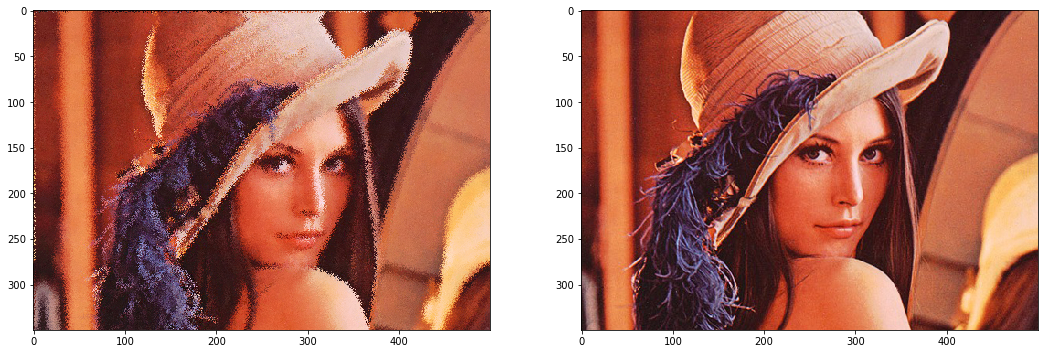

In [117]:


from matplotlib import pyplot as plt
import os,sys,cv2
import numpy as np

K = 5
source = cv2.imread('images/0.jpg',1)
H,W,C= source.shape

#################################################
#PADDING
source_padding = cv2.copyMakeBorder(source, K*2, K * 2, K * 2, K * 2, cv2.BORDER_REFLECT)

#################################################
#随机值
randx = np.random.randint(-K//2,K//2,size=(H,W))
randy = np.random.randint(-K//2,K//2,size=(H,W))

##########################################
#毛玻璃
result = np.zeros((H,W,3))
for y in range(0,H):
    for x in range(0,W):
        result[y,x,:] = source_padding[y + randy[y,x], x + randx[y,x],:]
result = np.clip(result,0,255).astype(np.uint8)

fig = plt.figure(figsize=(18, 18))
plt.subplot(1,2,1)
plt.imshow(result[:,:,::-1],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(source[:,:,::-1],cmap='gray')

